In [2]:
from qiskit import *

In [3]:
# qubits
qr = QuantumRegister(2)

# classical bits
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [4]:
# hadamard gate
circuit.h(qr[0])
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [5]:
# controlled not gate
circuit.cx(qr[0], qr[1])
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [6]:
%matplotlib inline

In [7]:
circuit.measure(qr, cr)
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

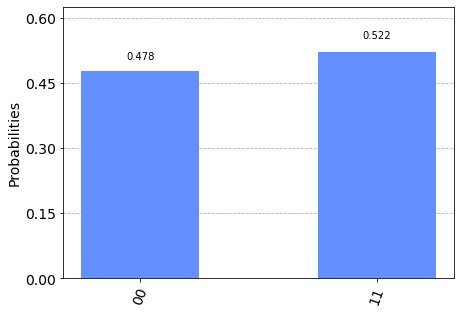

In [8]:
# running simulated quantum computer (quant assebly) on classical local computer

simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)

# visualise the same using qiskit tools
from qiskit.tools.visualization import plot_histogram

# use result variable to store result
result = execute(circuit, backend=simulator).result()

plot_histogram(result.get_counts(circuit))

In [9]:
# now to run on a real quantum computer, save your account and load it

# https://quantum-computing.ibm.com/ -> My Account -> copy token

# IBMQ.save_account('token')

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider('ibm-q')

# device : ibmq_16_melbourne
qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(circuit, backend=qcomp)

# public devices have queue maintained for all the jobs.
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


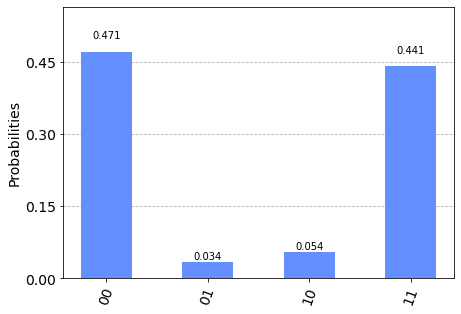

In [11]:
result = job.result()
plot_histogram(result.get_counts(circuit))